In [15]:
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

from kinecture import speakerxy_experiment, ml_helper, plot_helper

# When we make changes to modules, automatically reload the modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
xls = pd.ExcelFile('data/allData-filtered.xlsx')
dataframe = xls.parse('filtered-noFormulas')

print("number of train instances:", len(dataframe))

number of train instances: 8906


In [27]:
dataframe = ml_helper.clean_data(dataframe)

column id not found (may already be removed)
column order not found (may already be removed)
column SISP not found (may already be removed)
column SNS not found (may already be removed)
column audTime not found (may already be removed)
column heuristic not found (may already be removed)
column timestampUNIX not found (may already be removed)


In [29]:
dataframe = ml_helper.gen_features(dataframe)

In [30]:
dataframe = speakerxy_experiment.gen_my_speaker_features(dataframe)

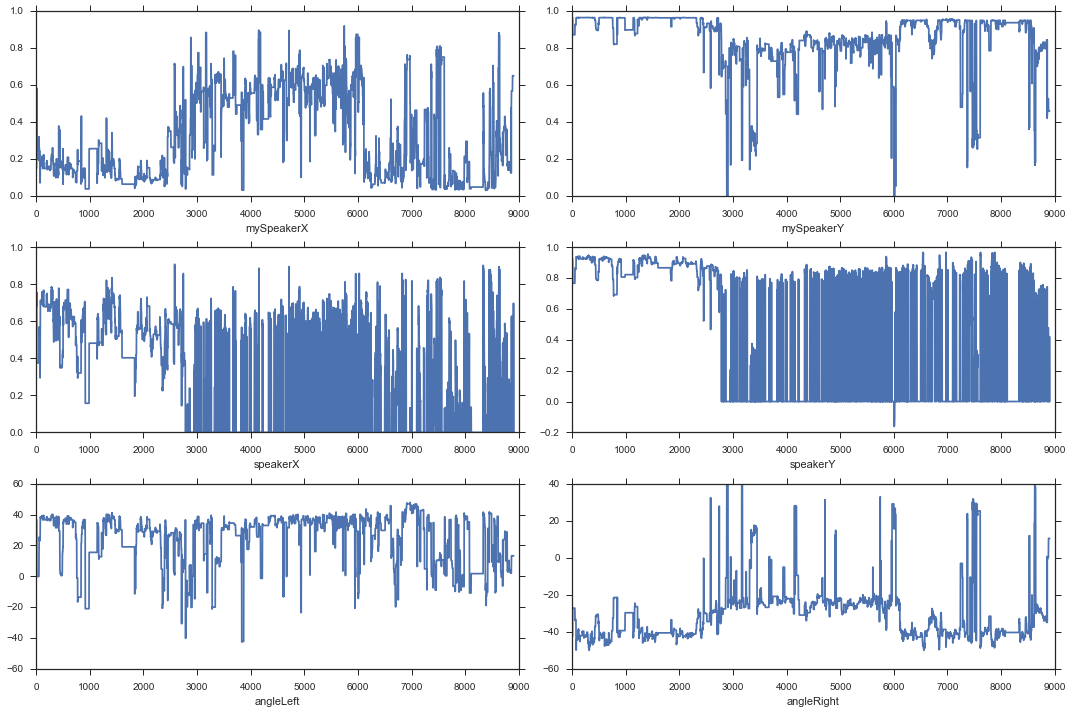

In [25]:
plot_helper.plot_timeseries(dataframe, 
                          ['mySpeakerX', 'mySpeakerY', 
                           'speakerX', 'speakerY',
                           'angleLeft', 'angleRight'], 2, figsize=(15, 10))

In [34]:
experiment_dataframe = dataframe.copy()
experiment_condition = ml_helper.convert_features_for_sklearn(experiment_dataframe)

control_dataframe = dataframe.copy()
ml_helper.remove_columns(control_dataframe, ['mySpeakerX', 'mySpeakerY'])
control_condition = ml_helper.convert_features_for_sklearn(control_dataframe)

In [38]:
from sklearn import cross_validation
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)

control_scores = cross_validation.cross_val_score(clf, control_condition.X, control_condition.y, cv=5)
experiment_scores = cross_validation.cross_val_score(clf, experiment_condition.X, experiment_condition.y, cv=5)

In [39]:
def show_results(scores, condition):
    print("%s Accuracy: %0.2f (+/- %0.2f)" % (condition, scores.mean(), scores.std() * 2))

show_results(control_scores, "Control")
show_results(experiment_scores, "Experiment")

Control Accuracy: 0.60 (+/- 0.20)
Experiment Accuracy: 0.60 (+/- 0.20)


In [40]:
control_scores

array([ 0.45933819,  0.50673401,  0.6793936 ,  0.70505618,  0.66966292])

In [41]:
experiment_scores

array([ 0.45933819,  0.50392817,  0.68163953,  0.70337079,  0.66966292])